In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_grad(x):
    return x * (1 - x)

In [3]:
class MLP:
    def __init__(self,inp,hidden,out):
        self.hidden_w = np.random.random(size=(inp,hidden))
        self.out_w = np.random.random(size=(hidden,out))
        self.hidden_b = np.random.random(size=(1,hidden))
        self.out_b = np.random.random(size=(1,out))
        self.lr = 0.1
    def learn(self , x,y):
        loss = 0
        for i in range(x.shape[0]):
            hidden = sigmoid(np.dot(x[i],self.hidden_w)+ self.hidden_b)
            out = sigmoid(np.dot(hidden,self.out_w)+ self.out_b)
            diff = y[i] - out
            out_grad = diff * sigmoid_grad(out)
            diff_hidden = out_grad.dot(self.out_w.T)
            hidden_grad = diff_hidden*sigmoid_grad(hidden)
            self.out_w += hidden.T.dot(out_grad) * self.lr
            self.out_b += np.sum(out_grad,axis=0,keepdims=True) * self.lr
            self.hidden_w += x[i:i+1].T.dot(hidden_grad) * self.lr
            self.hidden_b += np.sum(hidden_grad,axis=0,keepdims=True) * self.lr
            loss += diff[0,0]**2
        return loss/x.shape[0]
    def train(self , x,y,epochs = 1):
        for i in range(epochs):
            loss = self.learn(x,y)
            #print("At Epoch : " , i+1 , "  loss : " , loss)
            
    def predict(self,x):
        y = np.zeros((x.shape[0] , self.out_b.shape[1]))
        for i in range(x.shape[0]):
            hidden = sigmoid(np.dot(x[i],self.hidden_w)+ self.hidden_b)
            out = sigmoid(np.dot(hidden,self.out_w)+ self.out_b)
            y[i] = out
        return y

### XOR

In [4]:
x = np.array([[0,0] , [0,1] , [1,0] , [1,1]])
y = np.array([[0] , [1] , [1] , [0]])
N = 40000
mlp = MLP(2,2,1)
Error = []
for i in range(4 , N+1 , 4):
    x_train=x + np.random.normal(0,1e-3 , size = x.shape)
    y_train=y
    mlp.train(x_train,y_train)
    y_pred = mlp.predict(x)
    #print("At N=" , i , "  Error = " , np.mean((y-y_pred)**2))
    Error.append(np.mean((y-y_pred)**2))

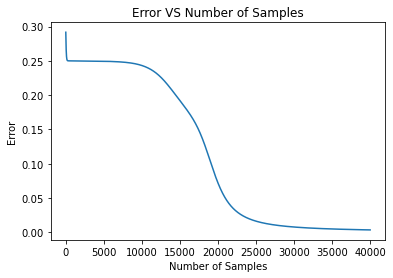

In [5]:
plt.title("Error VS Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.plot(range(4 , N+1 , 4) , Error)

### AND

In [6]:
x = np.array([[0,0] , [0,1] , [1,0] , [1,1]])
y = np.array([[0] , [0] , [0] , [1]])
N = 40000
mlp = MLP(2,2,1)
Error = []
for i in range(4 , N+1 , 4):
    x_train=x + np.random.normal(0,1e-3 , size = x.shape)
    y_train=y
    mlp.train(x_train,y_train)
    y_pred = mlp.predict(x)
    #print("At N=" , i , "  Error = " , np.mean((y-y_pred)**2))
    Error.append(np.mean((y-y_pred)**2))

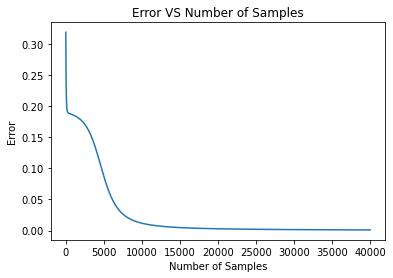

In [7]:
plt.title("Error VS Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.plot(range(4 , N+1 , 4) , Error)

### OR

In [8]:
x = np.array([[0,0] , [0,1] , [1,0] , [1,1]])
y = np.array([[0] , [1] , [1] , [1]])
N = 40000
mlp = MLP(2,2,1)
Error = []
for i in range(4 , N+1 , 4):
    x_train=x + np.random.normal(0,1e-3 , size = x.shape)
    y_train=y
    mlp.train(x_train,y_train)
    y_pred = mlp.predict(x)
    #print("At N=" , i , "  Error = " , np.mean((y-y_pred)**2))
    Error.append(np.mean((y-y_pred)**2))

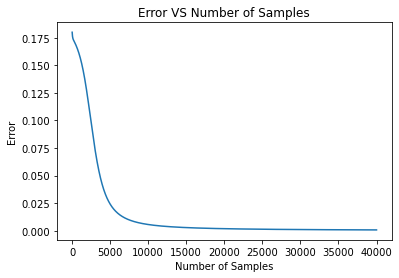

In [9]:
plt.title("Error VS Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.plot(range(4 , N+1 , 4) , Error)

# AUTOENCODER

In [10]:
from tensorflow.keras.datasets import mnist
from skimage.transform import resize
(x_train, _), (_ ,_) = mnist.load_data() 
x_train = resize(x_train, (x_train.shape[0], x_train.shape[1]//2, x_train.shape[2]//2), anti_aliasing = True) 
x_train = x_train.reshape(x_train.shape[0],-1)

## Note : Only importing MNIST dataset via tensorflow. 
## Not using this library for implementation of autoencoder for this problem

In [11]:
x_train.shape

(60000, 196)

In [12]:
x_train = x_train.astype("float32") / 255

In [13]:
import math
class SparseAE:
    def __init__(self,inp,hidden,out):
        r = math.sqrt(3) / math.sqrt(inp+hidden + 1)
        self.hidden_w = np.random.uniform(low = -r, high = r,size=(inp,hidden))
        self.out_w = np.random.uniform(low = -r, high = r,size=(hidden,out))
        self.hidden_b = np.random.uniform(low = -r, high = r,size=(1,hidden))
        self.out_b = np.random.uniform(low = -r, high = r,size=(1,out))
        self.lr = 0.001
        self.p = 0.05
        self.kl_factor = 0.1
        
    def learn(self , x,y):
        loss = 0
        kl_loss = 0
        for i in range(x.shape[0]):
            hidden = sigmoid(np.dot(x[i],self.hidden_w)+ self.hidden_b)
            out = sigmoid(np.dot(hidden,self.out_w)+ self.out_b)
            diff = y[i] - out
            #print(hidden.shape)
            zm = np.sum(hidden) /x.shape[1]
            #print(zm)
            sum_of_squares_error = 0.5 * np.sum(np.multiply(diff, diff)) / x.shape[1]
            kl_div = np.sum(self.p * np.log(self.p / zm) +
                    (1 - self.p) * np.log((1 - self.p) / (1 - zm)))  #KL Div Loss
            
            cost =sum_of_squares_error + self.kl_factor*kl_div
            KL_div_grad = -self.kl_factor * (-(self.p / zm) + ((1 - self.p) / (1 - zm))) #Grad for KL div
            
            out_grad = diff * sigmoid_grad(out)
            diff_hidden = out_grad.dot(self.out_w.T) + KL_div_grad
            hidden_grad = diff_hidden*sigmoid_grad(hidden)
            
            
            self.out_w += hidden.T.dot(out_grad) * self.lr
            self.out_b += np.sum(out_grad,axis=0,keepdims=True) * self.lr
            self.hidden_w += x[i:i+1].T.dot(hidden_grad) * self.lr
            self.hidden_b += np.sum(hidden_grad,axis=0,keepdims=True) * self.lr
            loss += cost
            kl_loss+= kl_div
            
        return loss/x.shape[0] , kl_loss/x.shape[0]
    def train(self , x,y,epochs = 15):
        for i in range(epochs):
            loss,kl_div = self.learn(x,y)
            print("At Epoch : " , i+1 , "total loss : " , loss , "KL loss : " , kl_div)
            
    def predict(self,x):
        y = np.zeros((x.shape[0] , self.out_b.shape[1]))
        for i in range(x.shape[0]):
            hidden = sigmoid(np.dot(x[i],self.hidden_w)+ self.hidden_b)
            out = sigmoid(np.dot(hidden,self.out_w)+ self.out_b)
            y[i] = out
        return y

In [14]:
autoencoder = SparseAE(196,300,196)

In [15]:
autoencoder.train(x_train[:1000],x_train[:1000]) #Reduced dataset size for fast training

At Epoch :  1 total loss :  0.13426119461951452 KL loss :  1.1265971860236716
At Epoch :  2 total loss :  0.10566930778912693 KL loss :  1.0203275522718698
At Epoch :  3 total loss :  0.09555149712823677 KL loss :  0.9326624303047213
At Epoch :  4 total loss :  0.08777326079901239 KL loss :  0.8598302315968072
At Epoch :  5 total loss :  0.08135748271866702 KL loss :  0.7981533008362123
At Epoch :  6 total loss :  0.07590386492620603 KL loss :  0.7450519608803429
At Epoch :  7 total loss :  0.07118025273663924 KL loss :  0.6987129426396389
At Epoch :  8 total loss :  0.06703299349920162 KL loss :  0.6578262428831905
At Epoch :  9 total loss :  0.06335313719771331 KL loss :  0.6214184992697569
At Epoch :  10 total loss :  0.06005996722188878 KL loss :  0.5887481943655557
At Epoch :  11 total loss :  0.05709177385931789 KL loss :  0.5592381170719614
At Epoch :  12 total loss :  0.054400222806297444 KL loss :  0.5324305422381518
At Epoch :  13 total loss :  0.05194671127558749 KL loss :  

# Variational AutoEncoder

In [16]:
import tensorflow as tf
from skimage.transform import resize

In [17]:
class VAE(tf.keras.Model):
    def __init__(self, **kwargs):
        super(VAE, self).__init__(**kwargs)
        latent_dim = 2
        input_encoder = tf.keras.Input(shape=(14, 14, 1))
        x = tf.keras.layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(input_encoder)
        #x = tf.keras.layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(16, activation="relu")(x)
        z_mu = tf.keras.layers.Dense(latent_dim)(x)
        z_sigma = tf.keras.layers.Dense(latent_dim)(x)
        self.encoder = tf.keras.Model(input_encoder, [z_mu,z_sigma])
        
        input_decoder = tf.keras.Input(shape=(latent_dim,))
        y = tf.keras.layers.Dense(7 * 7 * 32, activation="relu")(input_decoder)
        y = tf.keras.layers.Reshape((7, 7, 32))(y)
        y = tf.keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(y)
        #y = tf.keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(y)
        output = tf.keras.layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(y)
        self.decoder = tf.keras.Model(input_decoder, output)
    
    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            mu, sigma = self.encoder(data)
            batch = tf.shape(mu)[0]
            dim = tf.shape(mu)[1]
            epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
            z = mu + tf.exp(0.5 * sigma) * epsilon
            generated = self.decoder(z)
            gloss = tf.reduce_mean(
                    tf.keras.losses.binary_crossentropy(data, generated)
                ) * 14*14
            kl_loss = 1 + sigma - tf.square(mu) - tf.exp(sigma)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = gloss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "bce_loss": gloss,
            "kl_loss": kl_loss,
        }
    
    def summary(self):
        print(encoder.summary())
        print(decoder.summary())
        
        
        
        

In [18]:
vae = VAE()

In [19]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = resize(x_train, (x_train.shape[0], x_train.shape[1]//2, x_train.shape[2]//2), anti_aliasing = True) 
x_test = resize(x_test, (x_test.shape[0], x_test.shape[1]//2, x_test.shape[2]//2), anti_aliasing = True) 

In [20]:
x = np.concatenate([x_train, x_test], axis=0)
x = np.expand_dims(x, -1).astype("float32") / 255
vae.compile(optimizer=tf.keras.optimizers.Adam())
hist = vae.fit(x, epochs=20, batch_size=128)


#Limiting number of epochs to save time

Epoch 1/20
547/547 [==============================] - 9s 17ms/step - loss: 6.1451 - bce_loss: 6.0553 - kl_loss: 0.0898
Epoch 2/20
547/547 [==============================] - 10s 18ms/step - loss: 0.8190 - bce_loss: 0.8188 - kl_loss: 2.2744e-04
Epoch 3/20
547/547 [==============================] - 10s 18ms/step - loss: 0.7922 - bce_loss: 0.7922 - kl_loss: 2.7358e-05
Epoch 4/20
547/547 [==============================] - 10s 18ms/step - loss: 0.7851 - bce_loss: 0.7851 - kl_loss: 9.9755e-06
Epoch 5/20
547/547 [==============================] - 10s 18ms/step - loss: 0.7824 - bce_loss: 0.7823 - kl_loss: 9.2408e-06
Epoch 6/20
547/547 [==============================] - 10s 18ms/step - loss: 0.7807 - bce_loss: 0.7807 - kl_loss: 6.3054e-06
Epoch 7/20
547/547 [==============================] - 10s 18ms/step - loss: 0.7799 - bce_loss: 0.7799 - kl_loss: 3.0019e-06
Epoch 8/20
547/547 [==============================] - 10s 18ms/step - loss: 0.7790 - bce_loss: 0.7790 - kl_loss: 1.3469e-06
Epoch 9/20
54

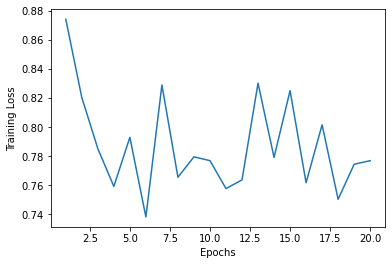

In [21]:
losses = hist.history["loss"]
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.plot(range(1,len(losses)+1) , losses)
plt.show()

In [25]:
z_sample = np.array([[0.25,0.2]])
x_decoded = vae.decoder(z_sample)

In [26]:
x_decoded.shape

TensorShape([1, 14, 14, 1])

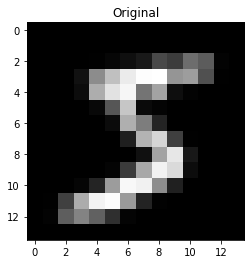

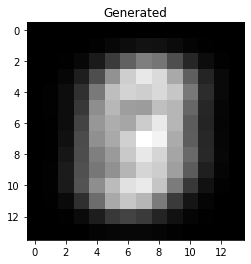

In [27]:
plt.title("Original")
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.show()
plt.title("Generated")
plt.imshow(x_decoded[0],cmap=plt.get_cmap('gray'))
plt.show()